**Эксперименты**

**Эксперимент 1**

Предобработка

In [ ]:
%pip install pandas

In [ ]:
%pip install matplotlib

In [ ]:
%pip install seaborn

In [ ]:
%pip install tqdm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline
%load_ext autoreload
from tqdm import tqdm
%autoreload 2
sns.set(style="darkgrid")
import numpy as np

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.sample(7)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9434,1223089038,20140711T000000,665000.0,5,2.25,3320,60984,2.0,0,0,...,9,3320,0,2000,0,98045,47.4862,-121.718,1580,55322
13192,7697800040,20140826T000000,470000.0,4,2.75,2150,9820,1.0,0,0,...,8,1220,930,1979,0,98011,47.7758,-122.200,2060,9830
2718,546000045,20150325T000000,422500.0,2,1.00,800,4046,1.0,0,0,...,7,800,0,1940,0,98117,47.6895,-122.382,1400,4046
20889,3278613060,20140805T000000,425000.0,4,2.50,1900,2766,2.0,0,0,...,8,1900,0,2014,0,98106,47.5430,-122.368,1900,2604
14273,5458800620,20140924T000000,685000.0,3,1.75,1650,8400,1.0,0,0,...,8,1470,180,1959,0,98040,47.5766,-122.236,2020,7777
6841,3449800290,20150406T000000,641000.0,5,2.75,3710,8674,2.0,0,0,...,9,3710,0,1996,0,98056,47.5140,-122.176,3250,8678
4712,2878601425,20140522T000000,600000.0,3,1.75,1650,5100,1.0,0,0,...,7,1040,610,1908,0,98115,47.6873,-122.321,1540,5100


In [3]:
data['date'] = pd.to_datetime(data['date'])
y = data['price']
data = data.drop(['price'], axis=1)

In [4]:
data[data.duplicated(subset=['id'], keep=False)]
#data = data.drop([['price', 'id']])

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,2014-12-23,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,2014-06-18,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,2014-12-09,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,2014-09-05,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,2015-03-30,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,2014-06-26,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,2015-05-04,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,2014-10-03,3,3.00,2780,6000,2.0,0,0,3,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


Наводит на мысль чточем старше дом тем он дороже.  Тепер айдишники не несут никакой информации, их можно удалить.

In [5]:
data = data.drop(['id'], axis=1)


In [6]:
data['year'] = data.date.dt.year
data['day_of_weak'] = data.date.dt.day_of_week
data['day'] = data.date.dt.day
data['month'] = data.date.dt.month

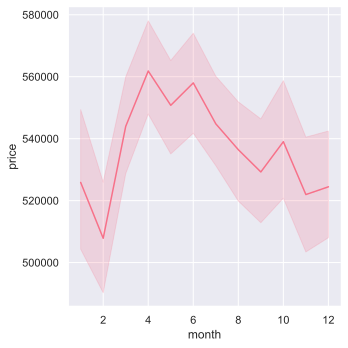

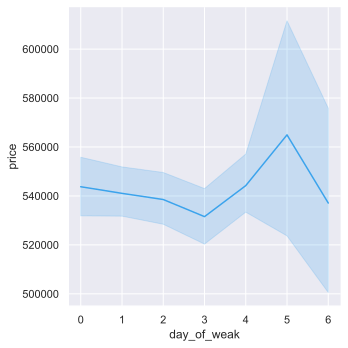

In [7]:
sns.relplot(data=data, y=y, x='month', kind='line',
    color=sns.husl_palette(n_colors=1)[0])

sns.relplot(data=data, y=y, x='day_of_weak', kind='line',
    color=sns.husl_palette(n_colors=3)[2])

In [8]:
data.isnull().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
day_of_weak      0
day              0
month            0
dtype: int64

In [9]:
data = data.drop(['date'], axis=1)

In [10]:
from sklearn.model_selection import train_test_split
print('Data shape', data.shape)
X_train, X_test, y_train, y_test = train_test_split(data, y,
    test_size=0.3, random_state=1)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Data shape (21613, 22)
Train shape: (15129, 22)
Test shape: (6484, 22)


In [21]:
import sys
sys.path.insert(0, '/Users/nickpan/PythonProjects/sem-5/prac/task3/src')

In [22]:
from ensembles import RandomForestMSE, GradientBoostingMSE
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
max_depth = [3, 4, 5, 6, 7]
n_estimators = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
n_features = [1, 3, 7, 10, 13, 17, 19, 22]

sk_mod = GradientBoostingRegressor()
my_mod =  GradientBoostingMSE()
sk_mod.fit(X_train, y_train)
my_mod.fit(X_train, y_train)
print(np.sqrt(np.mean((sk_mod.predict(X_test) - y_test) ** 2)))
print(np.sqrt(np.mean((my_mod.predict(X_test) - y_test) ** 2)))

146079.46457833378
146967.6152205644


In [23]:
sk_mod = RandomForestRegressor()
my_mod =  RandomForestMSE()
sk_mod.fit(X_train, y_train)
my_mod.fit(X_train, y_train)
print(np.sqrt(np.mean((sk_mod.predict(X_test) - y_test) ** 2)))
print(np.sqrt(np.mean((my_mod.predict(X_test) - y_test) ** 2)))

147945.9265958012
151766.9804660369


In [24]:
data.sample(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,day_of_weak,day,month
8663,4,2.25,1810,7068,2.0,0,0,5,7,1810,...,0,98034,47.7319,-122.204,1460,7274,2015,2,1,4
20844,2,2.50,1780,2493,3.0,0,0,3,8,1780,...,0,98107,47.6704,-122.358,2050,4400,2015,1,28,4
20322,5,4.00,4410,14380,2.0,0,0,3,11,4410,...,0,98052,47.6463,-122.121,2720,11454,2014,3,12,6
20429,4,2.50,2440,4850,2.0,0,0,3,8,2440,...,0,98052,47.7043,-122.114,2970,5450,2014,1,24,6
19281,4,2.50,3440,6332,2.0,0,0,3,10,3440,...,0,98059,47.5347,-122.155,3310,6528,2015,2,18,2


**Эксперимент 2**

Исследуйте поведение алгоритма случайный лес. Изучите зависимость RMSE на отложенной выборке
и время работы алгоритма в зависимости от следующих факторов:  

• количество деревьев в ансамбле  
• размерность подвыборки признаков для одного дерева  
• максимальная глубина дерева (дополнительно разберите случай, когда глубина неограничена) 

In [25]:
from time import time
max_depth = [1, 2, 3, 4, 5, 6, 7, 10, 14, None]
n_estimators = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700, 1000, 1500]
n_features = [1, 3, 7, 10, 13, 17, 19, 22]
rmse = lambda f, X, y: np.sqrt(np.mean((f.predict(X) - y) ** 2))
rmse_rf_max_depth= []
time_rf_max_depth = []
for depth in max_depth:
    rf_clf = RandomForestMSE(max_depth=depth)
    start_time = time()
    rf_clf.fit(X_train, y_train)
    end_time = time()
    time_rf_max_depth.append(end_time - start_time)
    rmse_rf_max_depth.append(rmse(rf_clf, X_test, y_test))


In [26]:
!pwd

/Users/nickpan/PythonProjects/sem-5/prac/task3


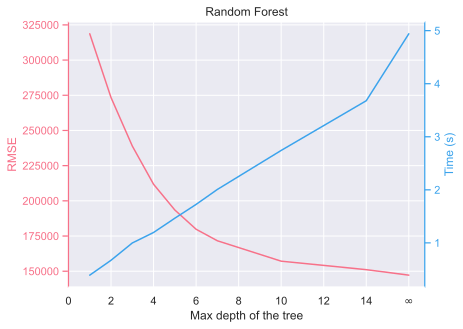

In [27]:
color_rmse = sns.husl_palette(3)[0]
color_time = sns.husl_palette(3)[2]
x = max_depth[:-1] + [16]
ax1 = sns.lineplot(x=x, y=rmse_rf_max_depth, ci=False, color=color_rmse)
ax1.set_ylabel("RMSE", color=color_rmse)
ax1.tick_params(axis='y', colors=color_rmse)

ax2 = ax1.twinx()

sns.lineplot(x=x, y=time_rf_max_depth, ci=False, color=color_time, ax=ax2)
ax2.set_ylabel("Time (s)", color=color_time)
ax2.tick_params(axis='y', colors=color_time)
ax2.grid(False)

ax2.spines['left'].set_color(color_rmse)
ax2.spines['right'].set_color(color_time)
ax2.set_title("Random Forest")
ax1.set_xlabel("Max depth of the tree")
labels = list(str(i) for i in range(0, 15, 2)) + ['$\infty$']
ax2.set_xticks(range(0, 17, 2), labels)
plt.savefig('./report/exp1/max_depth.pdf', bbox_inches='tight')
None

In [30]:
rmse_rf_max_depth

[318661.66694514354,
 273395.18665432016,
 238960.1515982343,
 211774.3078623023,
 193485.24829467415,
 179815.17458128557,
 171634.95308255238,
 157137.55625138004,
 151115.019820023,
 147215.29039697273]

In [ ]:
%pip install ipywidgets
%pip install jupyter 
%pip freeze | grep -E '(jupyter|tqdm|ipy)'

In [29]:
rmse_rf_n_estimators = []
time_rf_n_estimators = []
for n in tqdm(n_estimators):
    rf_clf = RandomForestMSE(max_depth=None, n_estimators=n)
    start_time = time()
    rf_clf.fit(X_train, y_train)
    end_time = time()
    time_rf_n_estimators.append(end_time - start_time)
    rmse_rf_n_estimators.append(rmse(rf_clf, X_test, y_test))

100%|██████████| 12/12 [04:33<00:00, 22.78s/it]


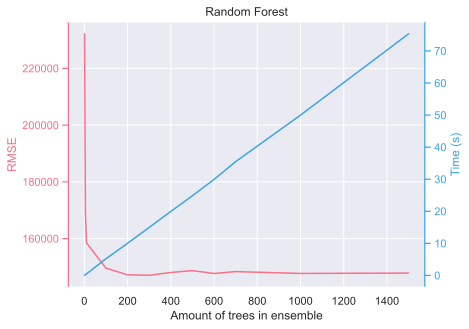

In [32]:
color_rmse = sns.husl_palette(3)[0]
color_time = sns.husl_palette(3)[2]

ax1 = sns.lineplot(x=n_estimators, y=rmse_rf_n_estimators, ci=False, color=color_rmse)
ax1.set_ylabel("RMSE", color=color_rmse)
ax1.tick_params(axis='y', colors=color_rmse)

ax2 = ax1.twinx()

sns.lineplot(x=n_estimators, y=time_rf_n_estimators, ci=False, color=color_time, ax=ax2)
ax2.set_ylabel("Time (s)", color=color_time)
ax2.tick_params(axis='y', colors=color_time)
ax2.grid(False)

ax2.spines['left'].set_color(color_rmse)
ax2.spines['right'].set_color(color_time)
ax2.set_title("Random Forest")
ax1.set_xlabel("Amount of trees in ensemble")
#labels = list(str(i) for i in range(0, 15, 2)) + ['None']
#ax2.set_xticks(range(0, 17, 2), labels)
plt.savefig('./report/exp1/n_estimators.pdf', bbox_inches='tight')
None

In [33]:
print(rmse_rf_n_estimators)

[232176.00072611254, 169231.48020905035, 158488.54269719427, 149594.43861490293, 147233.79204181986, 147077.82438086043, 148061.99815158054, 148725.16358316076, 147707.24658048502, 148367.69977244607, 147727.7304131655, 147852.45096338293]


In [35]:
rmse_rf_n_features = []
time_rf_n_features = []
for n in tqdm(n_features):
    rf_clf = RandomForestMSE(max_depth=None,
                            n_estimators=300, feature_subsample_size=n)
    start_time = time()
    rf_clf.fit(X_train, y_train)
    end_time = time()
    time_rf_n_features.append(end_time - start_time)
    rmse_rf_n_features.append(rmse(rf_clf, X_test, y_test))

100%|██████████| 8/8 [03:08<00:00, 23.54s/it]


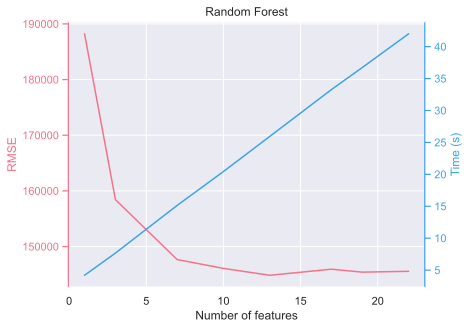

In [36]:
max_depth = [1, 2, 3, 4, 5, 6, 7, 10, 14, None]
n_estimators = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700, 1000, 1500]
n_features = [1, 3, 7, 10, 13, 17, 19, 22]
color_rmse = sns.husl_palette(3)[0]
color_time = sns.husl_palette(3)[2]

ax1 = sns.lineplot(x=n_features, y=rmse_rf_n_features, ci=False, color=color_rmse)
ax1.set_ylabel("RMSE", color=color_rmse)
ax1.tick_params(axis='y', colors=color_rmse)

ax2 = ax1.twinx()

sns.lineplot(x=n_features, y=time_rf_n_features, ci=False, color=color_time, ax=ax2)
ax2.set_ylabel("Time (s)", color=color_time)
ax2.tick_params(axis='y', colors=color_time)
ax2.grid(False)

ax2.spines['left'].set_color(color_rmse)
ax2.spines['right'].set_color(color_time)
ax2.set_title("Random Forest")
ax1.set_xlabel("Number of features")
plt.savefig('./report/exp1/n_features.pdf', bbox_inches='tight')
#labels = list(str(i) for i in range(0, 15, 2)) + ['None']
#ax2.set_xticks(range(0, 17, 2), labels)
None

In [37]:
print(rmse_rf_n_features)

[188218.97404222225, 158427.7042462191, 147658.8716117157, 146072.85711430406, 144838.531231202, 145932.3917359016, 145401.00430116444, 145550.09012585672]


3. Исследуйте поведение алгоритма градиентный бустинг. Изучите зависимость RMSE на отложенной
выборке и время работы алгоритма в зависимости от следующих факторов:

• количество деревьев в ансамбле  
• размерность подвыборки признаков для одного дерева  
• максимальная глубина дерева (дополнительно разберите случай, когда глубина неограничена)  
• выбранный learning_rate (каждый новый алгоритм добавляется в композицию с коэффициентом  
α · learning_rate )  

In [39]:
max_depth = [1, 2, 3, 4, 5, 6, 7, 10, 14, None]
n_estimators = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700, 1000, 1500]
n_features = [1, 3, 7, 10, 11, 12, 13, 15, 17, 19, 21, 22]
rmse_gbt_n_estimators = []
time_gbt_n_estimators = []
for n in tqdm(n_estimators):
    gbt_clf = GradientBoostingMSE(n_estimators=n)
    start_time = time()
    gbt_clf.fit(X_train, y_train)
    end_time = time()
    time_gbt_n_estimators.append(end_time - start_time)
    rmse_gbt_n_estimators.append(rmse(gbt_clf, X_test, y_test))

100%|██████████| 12/12 [01:34<00:00,  7.85s/it]


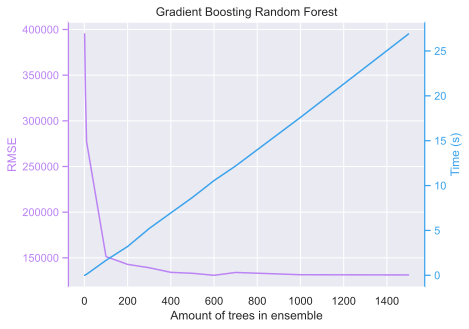

In [40]:
color_rmse = sns.husl_palette(9)[7]
color_time = sns.husl_palette(9)[6]

ax1 = sns.lineplot(x=n_estimators, y=rmse_gbt_n_estimators, ci=False, color=color_rmse)
ax1.set_ylabel("RMSE", color=color_rmse)
ax1.tick_params(axis='y', colors=color_rmse)

ax2 = ax1.twinx()

sns.lineplot(x=n_estimators, y=time_gbt_n_estimators, ci=False, color=color_time, ax=ax2)
ax2.set_ylabel("Time (s)", color=color_time)
ax2.tick_params(axis='y', colors=color_time)
ax2.grid(False)

ax2.spines['left'].set_color(color_rmse)
ax2.spines['right'].set_color(color_time)
ax2.set_title("Gradient Boosting Random Forest")
ax1.set_xlabel("Amount of trees in ensemble")
plt.savefig('./report/exp2/n_estimators.pdf', bbox_inches='tight')
#labels = list(str(i) for i in range(0, 15, 2)) + ['None']
#ax2.set_xticks(range(0, 17, 2), labels)
None

In [41]:
rmse_gbt_n_estimators

[395137.8681994684,
 330103.72157330095,
 277272.7095936283,
 151303.11125139438,
 142812.34444145253,
 139107.97284265194,
 134077.74954482287,
 133059.95232669232,
 130855.72304958143,
 133965.4550101766,
 131479.73450969244,
 131259.00772494025]

In [42]:
rmse_gbt_n_features = []
time_gbt_n_features = []
for n in n_features:
    gbt_clf = GradientBoostingMSE(feature_subsample_size=n, n_estimators=600)
    start_time = time()
    gbt_clf.fit(X_train, y_train)
    end_time = time()
    time_gbt_n_features.append(end_time - start_time)
    rmse_gbt_n_features.append(rmse(gbt_clf, X_test, y_test))

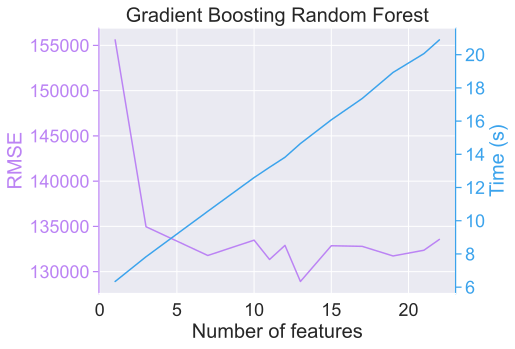

In [56]:
max_depth = [1, 2, 3, 4, 5, 6, 7, 10, 14, None]
n_estimators = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700, 1000, 1500]
n_features = [1, 3, 7, 10, 11, 12, 13, 15, 17, 19, 21, 22]

color_rmse = sns.husl_palette(9)[7]
color_time = sns.husl_palette(9)[6]

ax1 = sns.lineplot(x=n_features, y=rmse_gbt_n_features, ci=False, color=color_rmse)
ax1.set_ylabel("RMSE", color=color_rmse, fontsize=20)
ax1.tick_params(axis='y', colors=color_rmse)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax2 = ax1.twinx()

sns.lineplot(x=n_features, y=time_gbt_n_features, ci=False, color=color_time, ax=ax2)
ax2.set_ylabel("Time (s)", color=color_time, fontsize=20)
ax2.tick_params(axis='y', colors=color_time)
ax2.grid(False)

ax2.spines['left'].set_color(color_rmse)
ax2.spines['right'].set_color(color_time)
ax2.set_title("Gradient Boosting Random Forest", fontsize=20)
ax1.set_xlabel("Number of features", fontsize=20)
plt.yticks(fontsize=18)
plt.savefig('./report/exp2/n_features.pdf', bbox_inches='tight')
#labels = list(str(i) for i in range(0, 15, 2)) + ['None']
#ax2.set_xticks(range(0, 17, 2), labels)
None

In [44]:
print(rmse_gbt_n_features)

[155611.61402899702, 134961.44934213773, 131786.0484096668, 133480.52599212123, 131343.42611389686, 132901.49043852865, 128913.85087981995, 132862.4618391588, 132796.04397275773, 131732.75628514178, 132367.35361116272, 133563.38993529606]


In [45]:
rmse_gbt_max_depth = []
time_gbt_max_depth = []
for depth in max_depth:
    gbt_clf = GradientBoostingMSE(
        feature_subsample_size=13, n_estimators=600,
        max_depth=depth)
    start_time = time()
    gbt_clf.fit(X_train, y_train)
    end_time = time()
    time_gbt_max_depth.append(end_time - start_time)
    rmse_gbt_max_depth.append(rmse(gbt_clf, X_test, y_test))

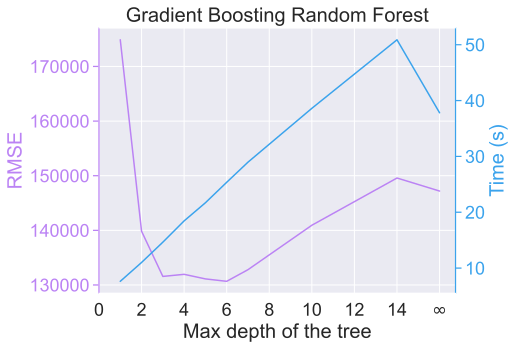

In [46]:
color_rmse = sns.husl_palette(9)[7]
color_time = sns.husl_palette(9)[6]
x = max_depth[:-1] + [16]
ax1 = sns.lineplot(x=x, y=rmse_gbt_max_depth, ci=False, color=color_rmse)
ax1.set_ylabel("RMSE", color=color_rmse, fontsize=20)
ax1.tick_params(axis='y', colors=color_rmse)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax2 = ax1.twinx()

sns.lineplot(x=x, y=time_gbt_max_depth, ci=False, color=color_time, ax=ax2)
ax2.set_ylabel("Time (s)", color=color_time, fontsize=20)
ax2.tick_params(axis='y', colors=color_time)
ax2.grid(False)

ax2.spines['left'].set_color(color_rmse)
ax2.spines['right'].set_color(color_time)
ax2.set_title("Gradient Boosting Random Forest", fontsize=20)
ax1.set_xlabel("Max depth of the tree", fontsize=20)
labels = list(str(i) for i in range(0, 15, 2)) + ['$\infty$']
ax2.set_xticks(range(0, 17, 2), labels)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('./report/exp2/max_depth.pdf', bbox_inches='tight')
None

In [54]:
learning_rates = np.round(np.logspace(-5, 0, 13), 5)
print(learning_rates)

[1.0000e-05 3.0000e-05 7.0000e-05 1.8000e-04 4.6000e-04 1.2100e-03
 3.1600e-03 8.2500e-03 2.1540e-02 5.6230e-02 1.4678e-01 3.8312e-01
 1.0000e+00]


In [47]:
rmse_gbt_learning_rates = []
time_gbt_learning_rates = []
import warnings
warnings.filterwarnings('ignore')
for learning_rate in learning_rates:
    gbt_clf = GradientBoostingMSE(
        feature_subsample_size=13,
        n_estimators=600,
        max_depth=6,
        learning_rate=learning_rate
    )
    start_time = time()
    gbt_clf.fit(X_train, y_train)
    end_time = time()
    time_gbt_learning_rates.append(end_time - start_time)
    rmse_gbt_learning_rates.append(rmse(gbt_clf, X_test, y_test))

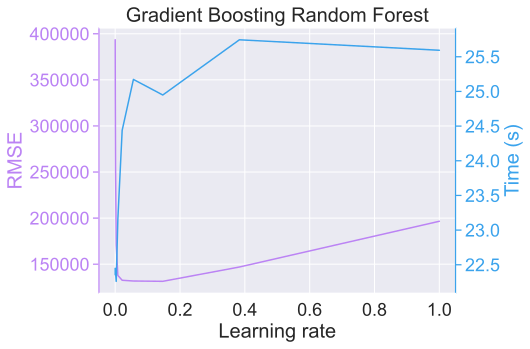

In [55]:
color_rmse = sns.husl_palette(9)[7]
color_time = sns.husl_palette(9)[6]

ax1 = sns.lineplot(x=learning_rates, y=rmse_gbt_learning_rates, ci=False,
                   color=color_rmse)
ax1.set_ylabel("RMSE", color=color_rmse, fontsize=20)
ax1.tick_params(axis='y', colors=color_rmse)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax2 = ax1.twinx()

sns.lineplot(x=learning_rates, y=time_gbt_learning_rates, ci=False, 
             color=color_time, ax=ax2)
ax2.set_ylabel("Time (s)", color=color_time, fontsize=20)
ax2.tick_params(axis='y', colors=color_time)
ax2.grid(False)

ax2.spines['left'].set_color(color_rmse)
ax2.spines['right'].set_color(color_time)
ax2.set_title("Gradient Boosting Random Forest", fontsize=20)
ax1.set_xlabel("Learning rate", fontsize=20)
plt.yticks(fontsize=18)
plt.savefig('./report/exp2/learning_rate.pdf', bbox_inches='tight')
#labels = list(str(i) for i in range(0, 15, 2)) + ['None']
#ax2.set_xticks(range(0, 17, 2), labels)
None


In [53]:
rmse_gbt_learning_rates

[393461.4989714766,
 390132.84474959865,
 383626.6606717321,
 366566.96336005675,
 328207.38693898625,
 253625.31222982716,
 171255.15604575168,
 137824.05170053322,
 132564.51117034498,
 131757.52373307315,
 131412.7755433226,
 146951.06426056163,
 196580.72872284963]

array([1.0000e-05, 3.0000e-05, 7.0000e-05, 1.8000e-04, 4.6000e-04,
       1.2100e-03, 3.1600e-03, 8.2500e-03, 2.1540e-02, 5.6230e-02,
       1.4678e-01, 3.8312e-01, 1.0000e+00])